<a href="https://colab.research.google.com/github/DrBenjAI/ML_tutorials/blob/master/Neural_network_basic_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a neural network
Let us train a neural network with Google Colab.
This notebook is inspired from [this Google Colab example](https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/tf2_image_retraining.ipynb#scrollTo=jvztxQ6VsK2k)

Initialization, importation of the tools for machine learning

In [ ]:
import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import layers

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.3.0
Hub version: 0.9.0
GPU is available


Downloading the data: photos of flowers

In [ ]:
data_dir = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

228818944/228813984 [==============================] - 3s 0us/step


In [ ]:
# Creating the training and validation sets
dataflow_kwargs = dict(interpolation="bilinear",  validation_split=.20, seed=123)

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, subset="validation", shuffle=True, **dataflow_kwargs)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, subset="training", shuffle=True, **dataflow_kwargs)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.
Found 3670 files belonging to 5 classes.
Using 2936 files for training.


Let us see what is in the dataset

Data classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


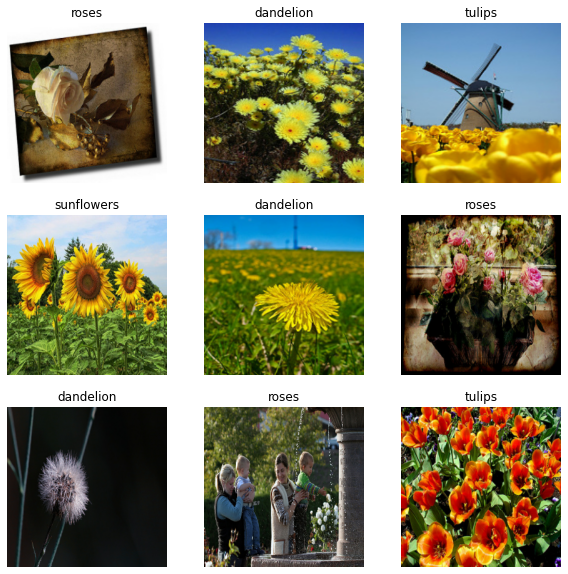

In [ ]:
class_names = train_ds.class_names
print('Data classes:',class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


## Creation of the neural network
* Structure in layers

![Neural network general structure](https://raw.githubusercontent.com/DrBenjAI/ML_tutorials/master/images/NN1.png)



In [ ]:
num_classes = 5

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
hist = model.fit(train_ds, validation_data=valid_ds, epochs=4).history 

Epoch 1/4
92/92 [==============================] - 10s 113ms/step - loss: 1.3860 - accuracy: 0.4278 - val_loss: 1.2601 - val_accuracy: 0.5123
Epoch 2/4
92/92 [==============================] - 10s 108ms/step - loss: 1.0109 - accuracy: 0.6049 - val_loss: 1.0137 - val_accuracy: 0.5886
Epoch 3/4
92/92 [==============================] - 10s 107ms/step - loss: 0.8113 - accuracy: 0.6914 - val_loss: 1.0887 - val_accuracy: 0.5722
Epoch 4/4
92/92 [==============================] - 10s 108ms/step - loss: 0.5892 - accuracy: 0.7800 - val_loss: 1.0818 - val_accuracy: 0.6267


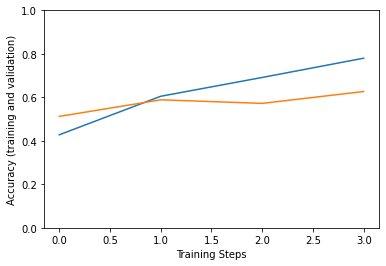

In [ ]:
plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])

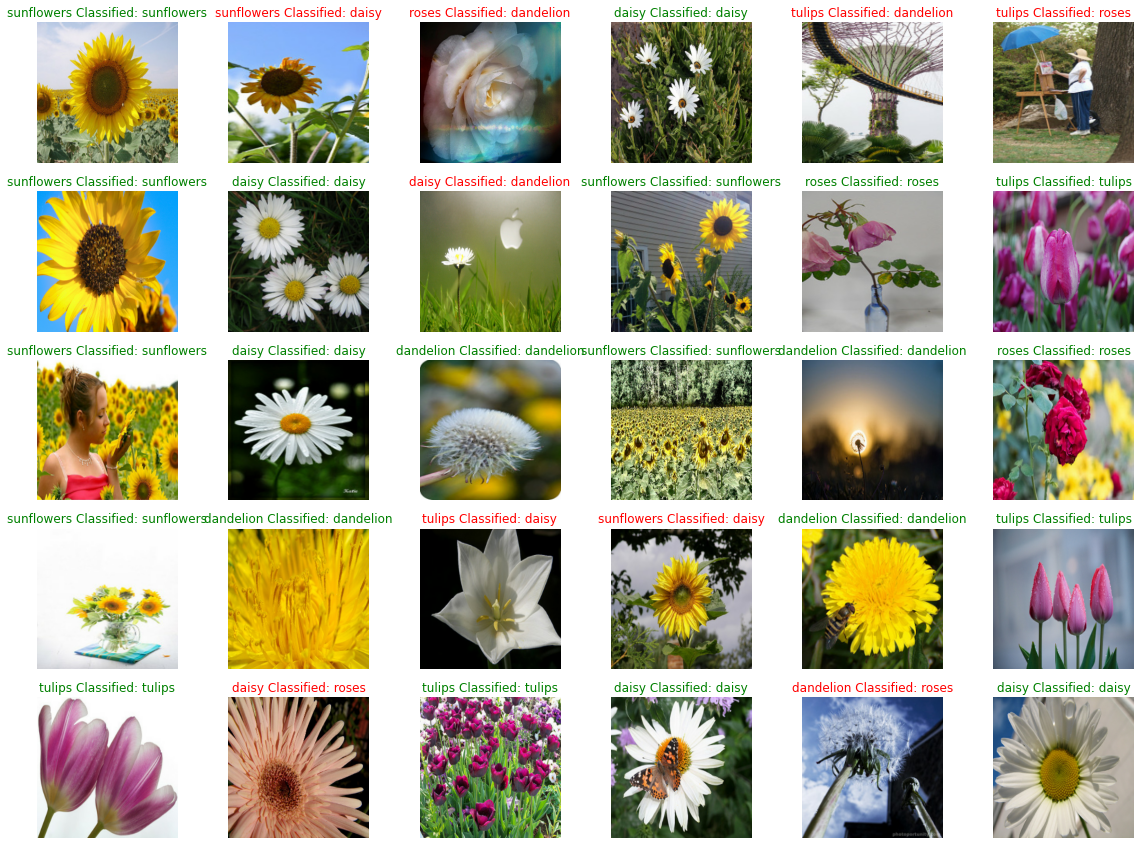

In [ ]:
plt.figure(figsize=(20, 15))
for images, labels in valid_ds.take(1):
  predictions = model.predict(images)
  for i in range(30):
    ax = plt.subplot(5, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    pred_i = class_names[np.argmax(predictions[i])]
    color = "green" if pred_i == class_names[labels[i]] else "red"
    plt.title(class_names[labels[i]]+' Classified: '+pred_i, color=color)
    #plt.title(class_names[np.argmax(pred[i])])
    plt.axis("off")